In [1]:
import os
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt

import pandas as pd
from pytrends.request import TrendReq

from fbprophet import Prophet

In [2]:
def searchTrends(words):
    print("Starting API...")
    pt = TrendReq(hl='en-US', tz = 360)
    print("Loading key words...")
    pt.build_payload(words, cat=0, timeframe='today 3-m', geo='MX', gprop='')
    print("Getting data...")
    data = pt.interest_over_time()
    print(data)
    return data

In [3]:
data = searchTrends(["pikachu sorprendido"])
data.drop(columns=['isPartial'], inplace=True)
data.reset_index(inplace = True)
data.columns = ["ds","y"]

Starting API...
Loading key words...
Getting data...
            pikachu sorprendido  isPartial
date                                      
2019-02-07                    0      False
2019-02-08                   35      False
2019-02-09                   21      False
2019-02-10                   22      False
2019-02-11                   17      False
2019-02-12                   33      False
2019-02-13                   16      False
2019-02-14                   52      False
2019-02-15                   18      False
2019-02-16                   43      False
2019-02-17                   22      False
2019-02-18                    0      False
2019-02-19                    0      False
2019-02-20                    0      False
2019-02-21                   50      False
2019-02-22                    0      False
2019-02-23                   21      False
2019-02-24                   22      False
2019-02-25                    0      False
2019-02-26                    0      False
2

In [4]:
model = Prophet()
model.fit(data)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [5]:
future = model.make_future_dataframe(periods=30)
future.tail()

,ds
112,2019-05-30
113,2019-05-31
114,2019-06-01
115,2019-06-02
116,2019-06-03


In [6]:
forecast = model.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
112,2019-05-30,4.061527,-16.969833,33.410456,4.061521,4.061533,3.975920,3.975920,3.975920,3.975920,3.975920,3.975920,0.0,0.0,0.0,8.037447
113,2019-05-31,3.870234,-16.729766,35.442802,3.870228,3.870241,5.460546,5.460546,5.460546,5.460546,5.460546,5.460546,0.0,0.0,0.0,9.330780
114,2019-06-01,3.678942,-27.124068,29.127476,3.678936,3.678949,-1.818530,-1.818530,-1.818530,-1.818530,-1.818530,-1.818530,0.0,0.0,0.0,1.860412
115,2019-06-02,3.487650,-19.198654,34.304637,3.487643,3.487657,3.626465,3.626465,3.626465,3.626465,3.626465,3.626465,0.0,0.0,0.0,7.114115
116,2019-06-03,3.296358,-29.333544,23.285267,3.296350,3.296365,-6.300808,-6.300808,-6.300808,-6.300808,-6.300808,-6.300808,0.0,0.0,0.0,-3.004450


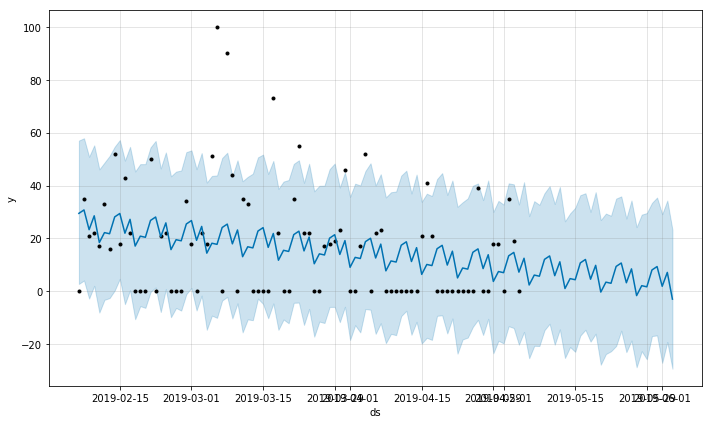

In [7]:
fig1 = model.plot(forecast)

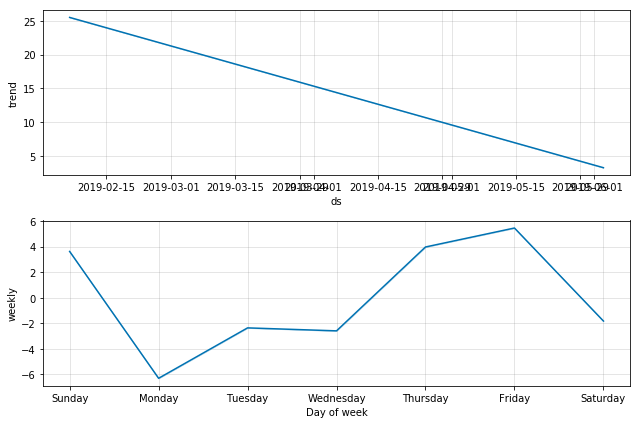

In [8]:
fig2 = model.plot_components(forecast)

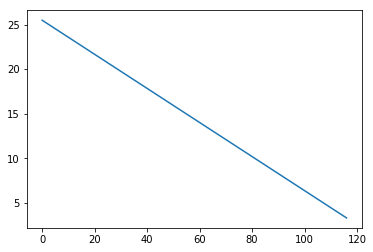

In [9]:
plt.plot(forecast["trend"])